In [30]:
from exp_framework.Ensemble import Ensemble, PretrainedEnsemble
from exp_framework.delegation import DelegationMechanism, UCBDelegationMechanism
from exp_framework.experiment import (
    Experiment,
    calculate_avg_std_test_accs,
    calculate_avg_std_test_accs_per_trial,
)
from matplotlib import pyplot as plt
from exp_framework.data_utils import Data
import numpy as np
import matplotlib as mpl
import seaborn as sns

In [31]:
batch_size = 128
window_size = 4
num_trials = 5
n_voters = 10

data = Data(
    data_set_name="mnist",
    # train_digit_groups=[range(5), range(5, 10)],
    # train_digit_groups=[[0, 1, 2], [3, 4, 5,], [6, 7, 8, 9]],
    train_digit_groups=[[0, 1], [2, 3], [4, 5], [6, 7], [8, 9]],
    test_digit_groups=[[0, 1], [2, 3], [4, 5], [6, 7], [8, 9]],
    # test_digit_groups=[range(5), range(5, 10)],
    batch_size=batch_size,
)

UCB_del_mech = UCBDelegationMechanism(
    batch_size=batch_size, window_size=window_size, ucb_window_size=None
)
NOOP_del_mech = DelegationMechanism(batch_size=batch_size, window_size=window_size)


pretrained_ensemble = PretrainedEnsemble(
    n_voters=n_voters, delegation_mechanism=UCB_del_mech, name="UCB_delegation_ensemble"
)

full_pretrained_ensemble = PretrainedEnsemble(
    n_voters=n_voters, delegation_mechanism=NOOP_del_mech, name="full_ensemble"
)

pretrained_ensemble.do_pretaining(data)

full_pretrained_ensemble.do_pretaining(data)

ensembles = [
    pretrained_ensemble,
    full_pretrained_ensemble,
    # Ensemble(
    #     training_epochs=1,
    #     n_voters=n_voters,
    #     delegation_mechanism=NOOP_del_mech,
    #     name="full_ensemble",
    #     input_dim=28 * 28,
    #     output_dim=10,
    # ),
]

exp = Experiment(n_trials=num_trials, ensembles=ensembles, data=data)
exp.run()

  0%|          | 0/5 [00:00<?, ?it/s]

Delegations:  {}
Delegations:  {Voter 1: Voter 0, Voter 2: Voter 5, Voter 3: Voter 5, Voter 4: Voter 5, Voter 6: Voter 0, Voter 7: Voter 0, Voter 8: Voter 0, Voter 9: Voter 5}
Delegations:  {Voter 1: Voter 5, Voter 2: Voter 5, Voter 3: Voter 0, Voter 4: Voter 5, Voter 6: Voter 5, Voter 7: Voter 0, Voter 8: Voter 0, Voter 9: Voter 0}
Delegations:  {Voter 1: Voter 0, Voter 2: Voter 5, Voter 3: Voter 0, Voter 4: Voter 0, Voter 6: Voter 5, Voter 7: Voter 0, Voter 8: Voter 0, Voter 9: Voter 0}
Delegations:  {Voter 1: Voter 0, Voter 2: Voter 5, Voter 3: Voter 0, Voter 4: Voter 5, Voter 6: Voter 5, Voter 7: Voter 0, Voter 8: Voter 5, Voter 9: Voter 0}
Delegations:  {Voter 1: Voter 0, Voter 2: Voter 5, Voter 3: Voter 5, Voter 4: Voter 5, Voter 6: Voter 0, Voter 7: Voter 0, Voter 8: Voter 5, Voter 9: Voter 0}
Delegations:  {Voter 1: Voter 0, Voter 2: Voter 0, Voter 3: Voter 0, Voter 4: Voter 5, Voter 6: Voter 0, Voter 7: Voter 5, Voter 8: Voter 0, Voter 9: Voter 5}
Delegations:  {Voter 1: Voter

 20%|██        | 1/5 [00:22<01:30, 22.63s/it]

Delegations:  {Voter 5: Voter 9, Voter 7: Voter 4, Voter 8: Voter 4, Voter 3: Voter 4, Voter 1: Voter 9, Voter 0: Voter 9, Voter 2: Voter 4, Voter 6: Voter 9}
Delegations:  {Voter 5: Voter 9, Voter 7: Voter 4, Voter 8: Voter 9, Voter 3: Voter 4, Voter 1: Voter 6, Voter 0: Voter 4, Voter 2: Voter 9, Voter 6: Voter 4, Voter 4: Voter 9}
Delegations:  {Voter 5: Voter 9, Voter 7: Voter 4, Voter 8: Voter 6, Voter 3: Voter 4, Voter 1: Voter 9, Voter 0: Voter 9, Voter 2: Voter 9, Voter 6: Voter 4, Voter 4: Voter 9}
Delegations:  {Voter 5: Voter 9, Voter 7: Voter 9, Voter 8: Voter 9, Voter 3: Voter 6, Voter 1: Voter 6, Voter 0: Voter 2, Voter 2: Voter 4, Voter 6: Voter 9, Voter 4: Voter 9}
Delegations:  {Voter 5: Voter 9, Voter 7: Voter 9, Voter 8: Voter 9, Voter 3: Voter 9, Voter 1: Voter 4, Voter 0: Voter 9, Voter 2: Voter 9, Voter 6: Voter 4, Voter 4: Voter 9}
Delegations:  {Voter 5: Voter 4, Voter 7: Voter 4, Voter 8: Voter 4, Voter 3: Voter 9, Voter 1: Voter 9, Voter 0: Voter 9, Voter 2: V

 40%|████      | 2/5 [00:41<01:01, 20.42s/it]

Delegations:  {Voter 6: Voter 9, Voter 0: Voter 9, Voter 1: Voter 9, Voter 2: Voter 9, Voter 3: Voter 9, Voter 4: Voter 9, Voter 5: Voter 9, Voter 7: Voter 9, Voter 8: Voter 9}
Delegations:  {Voter 6: Voter 9, Voter 0: Voter 9, Voter 1: Voter 9, Voter 2: Voter 9, Voter 3: Voter 9, Voter 4: Voter 9, Voter 5: Voter 9, Voter 7: Voter 9, Voter 8: Voter 9}
Delegations:  {Voter 6: Voter 9, Voter 0: Voter 9, Voter 1: Voter 9, Voter 2: Voter 9, Voter 3: Voter 9, Voter 4: Voter 9, Voter 5: Voter 9, Voter 7: Voter 9, Voter 8: Voter 9}
Delegations:  {Voter 6: Voter 3, Voter 0: Voter 9, Voter 1: Voter 9, Voter 2: Voter 9, Voter 3: Voter 9, Voter 4: Voter 9, Voter 5: Voter 9, Voter 7: Voter 9, Voter 8: Voter 9}
Delegations:  {Voter 6: Voter 1, Voter 0: Voter 1, Voter 5: Voter 3, Voter 7: Voter 1, Voter 8: Voter 1, Voter 9: Voter 1}
Delegations:  {Voter 6: Voter 0, Voter 0: Voter 3, Voter 5: Voter 3, Voter 8: Voter 4, Voter 9: Voter 0, Voter 1: Voter 7, Voter 2: Voter 7, Voter 3: Voter 7, Voter 4: V

 60%|██████    | 3/5 [01:01<00:40, 20.28s/it]

Delegations:  {Voter 2: Voter 4, Voter 1: Voter 4, Voter 3: Voter 4, Voter 5: Voter 4, Voter 6: Voter 4, Voter 7: Voter 4, Voter 8: Voter 4, Voter 9: Voter 4, Voter 0: Voter 4}
Delegations:  {Voter 2: Voter 4, Voter 1: Voter 4, Voter 3: Voter 4, Voter 5: Voter 4, Voter 6: Voter 4, Voter 7: Voter 4, Voter 8: Voter 4, Voter 9: Voter 4, Voter 0: Voter 4}
Delegations:  {Voter 2: Voter 4, Voter 1: Voter 4, Voter 3: Voter 4, Voter 5: Voter 4, Voter 6: Voter 4, Voter 7: Voter 4, Voter 8: Voter 4, Voter 9: Voter 4, Voter 0: Voter 4}
Delegations:  {Voter 2: Voter 4, Voter 1: Voter 4, Voter 3: Voter 4, Voter 5: Voter 4, Voter 6: Voter 4, Voter 7: Voter 4, Voter 8: Voter 4, Voter 9: Voter 4, Voter 0: Voter 4}
Delegations:  {Voter 2: Voter 4, Voter 1: Voter 4, Voter 3: Voter 4, Voter 5: Voter 4, Voter 6: Voter 4, Voter 7: Voter 4, Voter 8: Voter 4, Voter 9: Voter 4, Voter 0: Voter 4}
Delegations:  {Voter 2: Voter 4, Voter 1: Voter 4, Voter 3: Voter 9, Voter 5: Voter 4, Voter 6: Voter 4, Voter 7: V

 80%|████████  | 4/5 [01:21<00:20, 20.07s/it]

Delegations:  {Voter 0: Voter 9, Voter 1: Voter 9, Voter 2: Voter 9, Voter 3: Voter 9, Voter 4: Voter 9, Voter 5: Voter 9, Voter 6: Voter 9, Voter 7: Voter 1, Voter 8: Voter 9}
Delegations:  {Voter 0: Voter 9, Voter 1: Voter 9, Voter 2: Voter 9, Voter 3: Voter 9, Voter 4: Voter 9, Voter 5: Voter 9, Voter 6: Voter 9, Voter 7: Voter 9, Voter 8: Voter 9}
Delegations:  {Voter 0: Voter 9, Voter 1: Voter 9, Voter 2: Voter 9, Voter 3: Voter 9, Voter 4: Voter 9, Voter 5: Voter 9, Voter 6: Voter 9, Voter 7: Voter 9, Voter 8: Voter 9}
Delegations:  {Voter 0: Voter 9, Voter 1: Voter 9, Voter 2: Voter 9, Voter 3: Voter 9, Voter 4: Voter 9, Voter 5: Voter 9, Voter 6: Voter 9, Voter 7: Voter 9, Voter 8: Voter 9}
Delegations:  {Voter 0: Voter 6, Voter 1: Voter 9, Voter 2: Voter 9, Voter 3: Voter 9, Voter 4: Voter 9, Voter 5: Voter 9, Voter 6: Voter 9, Voter 7: Voter 9, Voter 8: Voter 9}
Delegations:  {Voter 0: Voter 9, Voter 1: Voter 9, Voter 2: Voter 9, Voter 3: Voter 9, Voter 4: Voter 9, Voter 5: V

100%|██████████| 5/5 [01:40<00:00, 20.01s/it]


{'UCB_delegation_ensemble': {0: {'batch_train_acc': [0.9921875,
    1.0,
    0.984375,
    0.9921875,
    1.0,
    1.0,
    0.9921875,
    1.0,
    1.0,
    1.0,
    0.9921875,
    1.0,
    1.0,
    1.0,
    1.0,
    1.0,
    1.0,
    1.0,
    1.0,
    1.0,
    0.9921875,
    0.9921875,
    1.0,
    1.0,
    1.0,
    0.9921875,
    0.9921875,
    1.0,
    1.0,
    1.0,
    0.9921875,
    0.9921875,
    1.0,
    1.0,
    1.0,
    1.0,
    0.984375,
    1.0,
    0.9921875,
    1.0,
    0.9921875,
    1.0,
    1.0,
    1.0,
    1.0,
    0.984375,
    1.0,
    0.9921875,
    1.0,
    1.0,
    0.9921875,
    1.0,
    1.0,
    1.0,
    1.0,
    1.0,
    0.9921875,
    0.9921875,
    1.0,
    0.9921875,
    0.9921875,
    0.9765625,
    1.0,
    0.9921875,
    1.0,
    1.0,
    1.0,
    0.984375,
    1.0,
    1.0,
    0.9921875,
    1.0,
    0.9921875,
    1.0,
    0.984375,
    1.0,
    1.0,
    1.0,
    0.9921875,
    1.0,
    1.0,
    1.0,
    0.9921875,
    1.0,
    1.0,
    1.0,
    1.0,

In [32]:
UCB_avg_test_accs, UCB_std_test_accs = calculate_avg_std_test_accs(
    exp, "UCB_delegation_ensemble", num_trials
)
full_avg_test_accs, full_std_test_accs = calculate_avg_std_test_accs(
    exp, "full_ensemble", num_trials
)

(
    UCB_avg_test_accs_per_trial,
    UCB_std_test_accs_per_trial,
) = calculate_avg_std_test_accs_per_trial(exp, "UCB_delegation_ensemble", num_trials)
(
    full_avg_test_accs_per_trial,
    full_std_test_accs_per_trial,
) = calculate_avg_std_test_accs_per_trial(exp, "full_ensemble", num_trials)

In [33]:
print(
    "Mean test accs for UCB delegation ensemble: ", np.mean(UCB_avg_test_accs_per_trial)
)
print("Mean test accs for full ensemble: ", np.mean(full_avg_test_accs_per_trial))
print()
print(
    "Std test accs for UCB delegation ensemble: ", np.std(UCB_avg_test_accs_per_trial)
)
print("Std test accs for full ensemble: ", np.std(full_avg_test_accs_per_trial))

Mean test accs for UCB delegation ensemble:  0.5956091772151899
Mean test accs for full ensemble:  0.28312895569620256

Std test accs for UCB delegation ensemble:  0.052129465195740264
Std test accs for full ensemble:  0.0


In [34]:
test_splits = exp.test_splits

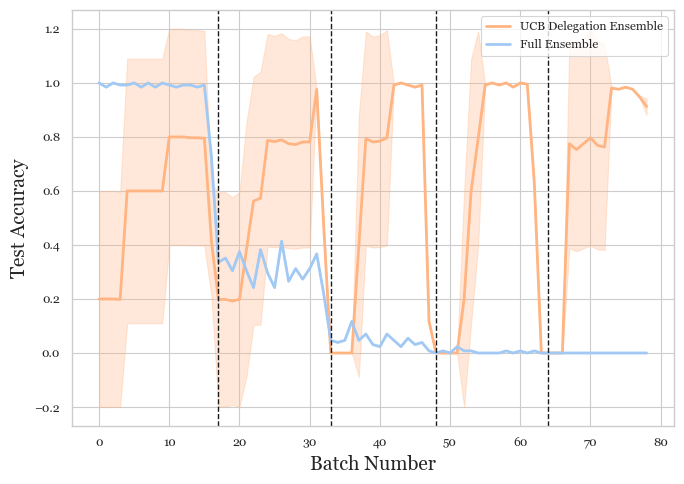

In [37]:
sns.set(style="whitegrid", palette="pastel", context="paper")

# Set the font to Georgia
mpl.rcParams["font.family"] = "Georgia"
mpl.rcParams["font.size"] = 12
mpl.rcParams["axes.labelsize"] = 14
mpl.rcParams["axes.titlesize"] = 16

fig, ax = plt.subplots(figsize=(7, 5))

colors = sns.color_palette("pastel")
ucb_color = colors[1]
full_color = colors[0]

ax.plot(
    UCB_avg_test_accs, label="UCB Delegation Ensemble", color=ucb_color, linewidth=2
)
ax.fill_between(
    range(len(UCB_avg_test_accs)),
    np.array(UCB_avg_test_accs) - np.array(UCB_std_test_accs),
    np.array(UCB_avg_test_accs) + np.array(UCB_std_test_accs),
    color=ucb_color,
    alpha=0.3,
)

ax.plot(full_avg_test_accs, label="Full Ensemble", color=full_color, linewidth=2)
ax.fill_between(
    range(len(full_avg_test_accs)),
    np.array(full_avg_test_accs) - np.array(full_std_test_accs),
    np.array(full_avg_test_accs) + np.array(full_std_test_accs),
    color=full_color,
    alpha=0.3,
)

# plot vertical lines at test splits
for split in test_splits[:-1]:
    ax.axvline(x=split, color="k", linestyle="--", linewidth=1)

# Setting labels, title, and legend
ax.set_xlabel("Batch Number")
ax.set_ylabel("Test Accuracy")
# ax.set_title("UCB Delegation Ensemble vs Full Ensemble")

ax.legend()

plt.tight_layout()

# Show the plot
plt.show()